# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [3]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})
da["SMQ020x"] = da.SMQ020.replace({1:"Yes",2:"No",7:np.nan,9:np.nan})


In [4]:
# insert your code here
dx = da[["RIAGENDRx","SMQ020x"]].dropna()
pr = dx.groupby("RIAGENDRx")["SMQ020x"].agg([lambda x: np.mean(x=="Yes"),"size"])
pr.columns = ["Proportion","N"]
print(pr)
#Proportion -> proportion of those males/females who smoke

           Proportion     N
RIAGENDRx                  
Female       0.304845  2972
Male         0.513258  2753


In [5]:
n1 = pr.N.Female          #no. of total females(pop grp 1)
n2 = pr.N.Male            #no. of total males(pop grp 2)
p_hat = (dx.SMQ020x=="Yes").mean()   #proportion of all the people who smoke
va = p_hat*(1-p_hat)

In [6]:
import scipy.stats .distributions as dist
#Calculating standard error
se = np.sqrt(va * (1/n1 + 1/n2))
test_Stats = (pr.Proportion.Female-pr.Proportion.Male)/se
p_value = 2*dist.norm.cdf(-np.abs(test_Stats))
print(test_Stats,p_value)


-16.049719603652488 5.742288777302776e-58


In [7]:
#Now via using libraries
dx_females = dx.loc[dx.RIAGENDRx=="Female", "SMQ020x"].replace({"Yes": 1, "No": 0})
dx_males = dx.loc[dx.RIAGENDRx=="Male", "SMQ020x"].replace({"Yes": 1, "No": 0})
sm.stats.ttest_ind(dx_females, dx_males) # prints test statistic, p-value, degrees of freedom


(-16.42058555898443, 3.032088786691117e-59, 5723.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

The proportion of women who smoke is significantly different than the proportion of men who smoke.Thus, rejecting the Null hypothesis

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [131]:
#no. of women who smoke
women_smoker = sum(dx_females.values==1)
#total women
total_women = len(dx_females)
lb1,ub1 = sm.stats.proportion_confint(women_smoker,total_women,alpha = 0.05)
print("Confidence Interval is:" ,(lb1,ub1))

Confidence Interval is: (0.2882949879861214, 0.32139545615923526)


In [132]:
#no. of men who smoke
men_smoker = sum(dx_males.values==1)
#total men
total_men = len(dx_males)
lb2,ub2 = sm.stats.proportion_confint(men_smoker,total_men,alpha = 0.05)
print("Confidence Interval is:" ,(lb2,ub2))

Confidence Interval is: (0.49458749263718593, 0.5319290347874418)


In [133]:
#For Proportion difference
x_d = pr.Proportion.Female - pr.Proportion.Male
#for standard error
se_female = np.sqrt((pr.Proportion.Female * (1 - pr.Proportion.Female)) / n1)
se_male = np.sqrt((pr.Proportion.Male * (1 - pr.Proportion.Male)) / n2)
s_d = np.sqrt(se_female**2 + se_male**2)
print(x_d,s_d)

-0.20841304163963553 0.012729881381407434


In [134]:
#Now finally CI for difference in the rates of smoking between women and men
lb3 = x_d - (1.96 * s_d)
ub3 = x_d + (1.96 * s_d)
print("Confidence Interval is:" ,(lb3,ub3))

Confidence Interval is: (-0.2333636091471941, -0.18346247413207697)


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The intervals do not include 0 which supports our rejection of Null hypothesis that proportion of men who smoke is different from proportion of men who smoke

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [135]:
# insert your code here
dz = da[["DMDEDUC2","BMXHT"]].dropna()
dz_graduated = dz[dz["DMDEDUC2"]==5]["BMXHT"]
dz_notgraduated = dz[dz["DMDEDUC2"]!=5]["BMXHT"]
mean1 = dz_graduated.mean()
mean2 = dz_notgraduated.mean()
mean1,mean2

(167.85535055350553, 165.46395864106353)

In [136]:

#standard error
se_graduate = dz_graduated.std() / np.sqrt(len(dz_graduated))
se_notgraduate = dz_notgraduated.std() / np.sqrt(len(dz_notgraduated))
se = np.sqrt(se_graduate**2 + se_notgraduate**2)
#test_statistic calculation
num = mean1 - mean2
t = num / se
p_value = 2 * dist.norm.cdf(-np.abs(t))
print(t,p_value)

7.758931901880966 8.564762039636526e-15


In [137]:
#Next, convert the heights from centimeters to inches, and conduct a test of
#the null hypothesis that the average heights (in inches) of the two groups are equal.
dz_graduated = dz_graduated / 2.54
dz_notgraduated = dz_notgraduated / 2.54
mean1 = dz_graduated.mean()
mean2 = dz_notgraduated.mean()
mean1,mean2

(66.0847836824825, 65.14329080356833)

In [138]:
#standard error
se_graduate = dz_graduated.std() / np.sqrt(len(dz_graduated))
se_notgraduate = dz_notgraduated.std() / np.sqrt(len(dz_notgraduated))
se = np.sqrt(se_graduate**2 + se_notgraduate**2)
#test_statistic calculation
num = mean1 - mean2
t = num / se
p_value = 2 * dist.norm.cdf(-np.abs(t))
print(t,p_value)

7.758931901880855 8.56476203964407e-15


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

As the p_value is small so we can reject the null hypothesis and tell that the two population proportions have different mean heights.

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

They are almost same

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [139]:
# insert your code here
du = da[da["RIAGENDR"]==1][["BMXBMI","RIDAGEYR"]].dropna()


In [184]:
du_3040 = du[(du["RIDAGEYR"] > 30) & (du["RIDAGEYR"] < 40)]["BMXBMI"]
du_5060 = du[(du["RIDAGEYR"] > 50) & (du["RIDAGEYR"] < 60)]["BMXBMI"]
#nOW TO TEST NULL HYPOTHESIS
print("The test_statistic,p_value and degrees of freedom are-:")
sm.stats.ttest_ind(du_3040,du_5060)

The test_statistic,p_value and degrees of freedom are-:


(1.3762846931583879, 0.16911717285940686, 803.0)

In [185]:
du_3040 = np.log(du_3040)
du_5060 = np.log(du_5060)
#nOW TO TEST NULL HYPOTHESIS
print("The test_statistic,p_value and degrees of freedom are-:")
sm.stats.ttest_ind(du_3040,du_5060)

The test_statistic,p_value and degrees of freedom are-:


(1.1090151684665284, 0.267755666336707, 803.0)

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

The mean BMI does not differ in both the cases(as large p_value),therefore we fail to reject the null hypothesis.The p_value is higher after log transformation 

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [142]:
# insert your code here
dw = da[((da["RIDAGEYR"]>30) & (da["RIDAGEYR"]<40)) & (da["RIAGENDR"]==2)][["DMDEDUC2","BMXBMI"]].dropna()


In [143]:
dw_graduate = dw[dw["DMDEDUC2"]==5]["BMXBMI"]
dw_notgraduate = dw[dw["DMDEDUC2"]!=5]["BMXBMI"]
print(dw_graduate.describe())
print("\n")
print(dw_notgraduate.describe())

count    131.000000
mean      28.158779
std        7.716724
min       17.100000
25%       22.850000
50%       26.500000
75%       31.900000
max       62.700000
Name: BMXBMI, dtype: float64


count    288.000000
mean      31.467014
std        8.511136
min       16.600000
25%       25.300000
50%       29.650000
75%       36.000000
max       60.900000
Name: BMXBMI, dtype: float64


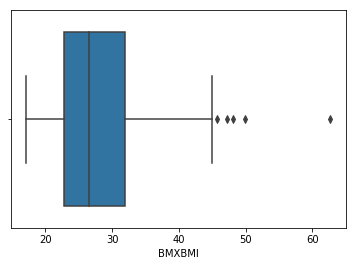

In [144]:
#for graduate women visualization
sns.boxplot(dw_graduate)

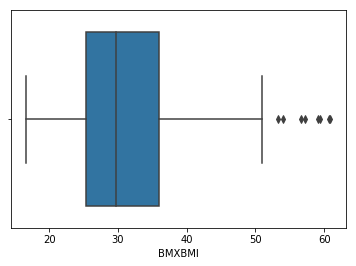

In [145]:
#for not graduated women visualization
sns.boxplot(dw_notgraduate)

In [146]:
#difference factor in the VARIANCE of these two populations
np.std(dw_graduate)**2 / np.std(dw_notgraduate)**2  #we see its not large

0.8186033748074519

In [147]:
dw_graduate = sm.stats.DescrStatsW(dw_graduate)
dw_notgraduate = sm.stats.DescrStatsW(dw_notgraduate)
test_statistic,p_value =  sm.stats.CompareMeans(dw_graduate,dw_notgraduate).ztest_ind(usevar = 'pooled')
test_statistic_new,p_value_new = sm.stats.CompareMeans(dw_graduate,dw_notgraduate).ztest_ind(usevar = 'unequal')


In [148]:
print("Pooled Approach:",test_statistic,p_value)
print("Unpooled/Unequal Approach",test_statistic_new,p_value_new)
#both p_values are almost same with little difference

Pooled Approach: -3.7951439648523055 0.00014755780808424048
Unpooled/Unequal Approach -3.9370103176897366 8.250306098873547e-05


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

The p_value is well below the threshold(alpha) so we reject the null hypothesis,these 2 population have different mean BMI

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

The ratio of these two population variances is approximately 0.8 .The p_value and test_statistic using pooled approach is larger than p_value and test_statistic using unpooled/unequal approach.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [149]:
# insert your code here
#THis one is for paired data test
dp = da[["BPXDI1","BPXDI2"]].dropna()


In [150]:
diff = dp.BPXDI1 - dp.BPXDI2
print("The mean is:",diff.mean())
test_statistic,p_value = sm.stats.ztest(diff)
print("Test statistic is " + str(test_statistic) + " and P_value is " + str(p_value))

The mean is: 0.3490407897187558
Test statistic is 4.140387087476751 and P_value is 3.467202439743513e-05


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

There are different mean values between first and second diastolic blood pressure measurements.we reject the null hypothesis.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [177]:
# insert your code here
dp_first = da.BPXDI1.dropna()
dp_second = da.BPXDI2.dropna()


In [178]:
dp_first.describe()

count    5401.000000
mean       69.516386
std        12.881575
min         0.000000
25%        62.000000
50%        70.000000
75%        78.000000
max       120.000000
Name: BPXDI1, dtype: float64

In [179]:
dp_second.describe()

count    5535.000000
mean       69.346703
std        13.022829
min         0.000000
25%        62.000000
50%        70.000000
75%        78.000000
max       144.000000
Name: BPXDI2, dtype: float64

WE SEE THAT THERE IS NOT MUCH DIFFERENCE IN VARIANCE OF THE TWO POPULATIONS (check for heteroscedasticity)

In [180]:
dp_first = sm.stats.DescrStatsW(dp_first)
dp_second = sm.stats.DescrStatsW(dp_second)


In [183]:
#WE use the pooled approach as variance is little to no different
sm.stats.CompareMeans(dp_first,dp_second).ztest_ind(usevar = 'pooled')

(0.6848982193746493, 0.49340814971248503)

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

When we treated the the 2 measurements in the first part as paired data we get small p_value therefore we reject the null hypothesis but when we treat the 2 measurements as separate populations we get a large p_value,thus failing to reject the null hypothesis. 